# Predicting Heart Disease using Machine Learning

This notebook looks into using python-bases ML and data science libraries in an attempt to build a ML model capable of predicting whether someone has Heart disease or not based on medical attributes.

We are going to follow the following steps;
  1. Problem definition
  2. Data
  3. Evaluation
  4. Features
  5. Modelling
  6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have Heart disease?

## 2. Data
The original data came from the Cleveland UCI ML repository

There is also a version of it available on kaggle https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether someone has Heart disease at proof of concept,we will pursue the project.

## 4. Features
This is where you will get the idea of all features of the data. You can  do this by doing your research(eg from the links) or talking to subject matter expert
    
**Create a data dictionary** ---learn how to make it
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

In [1]:
import sklearn
sklearn.__version__

'1.6.1'

#prepaaring tools
we are going to use numpy, pandas and matplotlib for data analysis and manipulation


In [2]:
#import all the tools we need
# regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear inside the notebook
%matplotlib inline 

# models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model eavaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [3]:
df = pd.read_csv('heart-disease.csv')
df                

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape

(303, 14)

## Data exploration (Exploratory Data Analysis or EDA)
The goal here is to become a subject matter expert on the dataset you are working with.

 1. what questions are you trying to solve?
 2. what kind of data do we have and how do we treat different types?
 3. what is missing from the data and how to deal with it?
 4. where are the outliers and why you should care about them?
 5. How can you remove,add or change to get more out of your data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# let us find out how many of each class there are
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

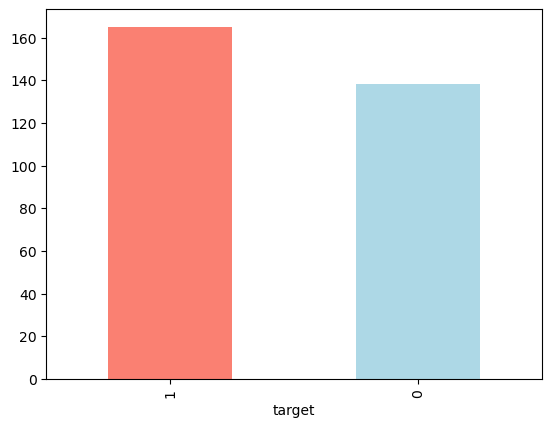

In [8]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue'])
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#are there missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart Disease Frequency according to SEX

In [12]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
# compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


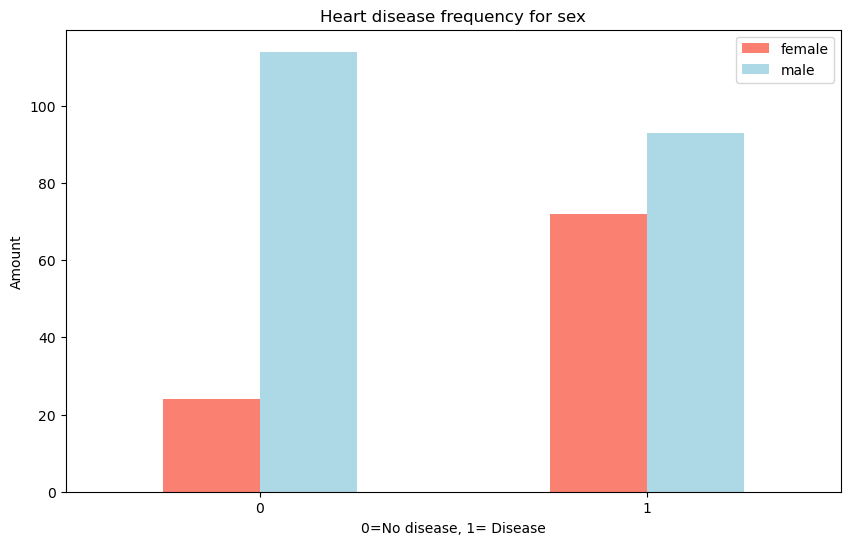

In [14]:
# create a plot of the crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue'])
plt.title('Heart disease frequency for sex')
plt.xlabel('0=No disease, 1= Disease')
plt.ylabel('Amount')
plt.legend(['female','male'])
plt.xticks(rotation=0)
plt.show()

In [15]:
df['thalach'].value_counts()

thalach
162    11
163     9
160     9
173     8
152     8
       ..
117     1
71      1
118     1
134     1
90      1
Name: count, Length: 91, dtype: int64

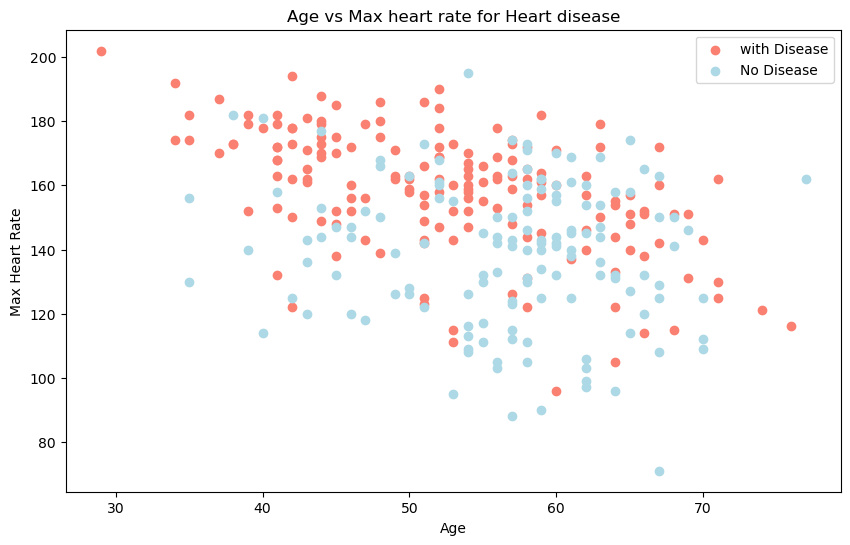

In [16]:
#Age vs Max heart rate for Heart disease
plt.figure(figsize=(10,6))
# scatter with positive example
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color='salmon')

#scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color='lightblue')
#Add some info
plt.title('Age vs Max heart rate for Heart disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['with Disease','No Disease'])
plt.show()


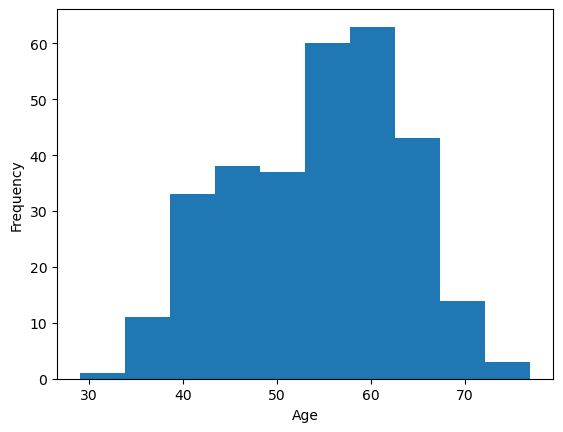

In [17]:
#check the distribution of age with a histogram
df.age.plot(kind='hist')
plt.xlabel('Age')
plt.show()

#### Heart disease frequency per chest pain Type
- 0:Typical angina
- 1:Atypical angina
- 2:Non-anginal pain
- 3:Asymptomatic

In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


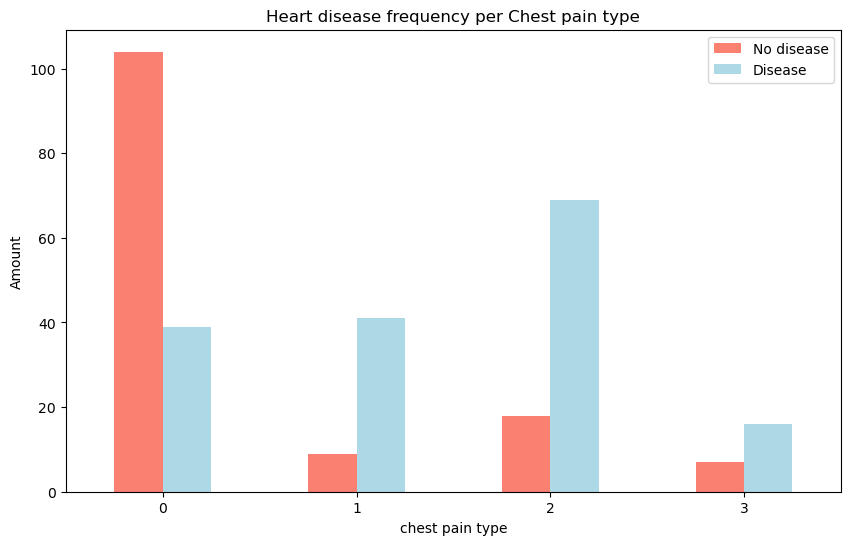

In [19]:
#make the crossbar more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                 figsize=(10,6),
                                 color=['salmon','lightblue'])
#add some communication
plt.title('Heart disease frequency per Chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('Amount')
plt.legend(['No disease', 'Disease'])
plt.xticks(rotation=0)

plt.show()

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
#make a correlation matrix
# a higher positive value means a higher positive correlation .
#Negative correlation- a r\ship between two variables in which one variable increases as the other decreases
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


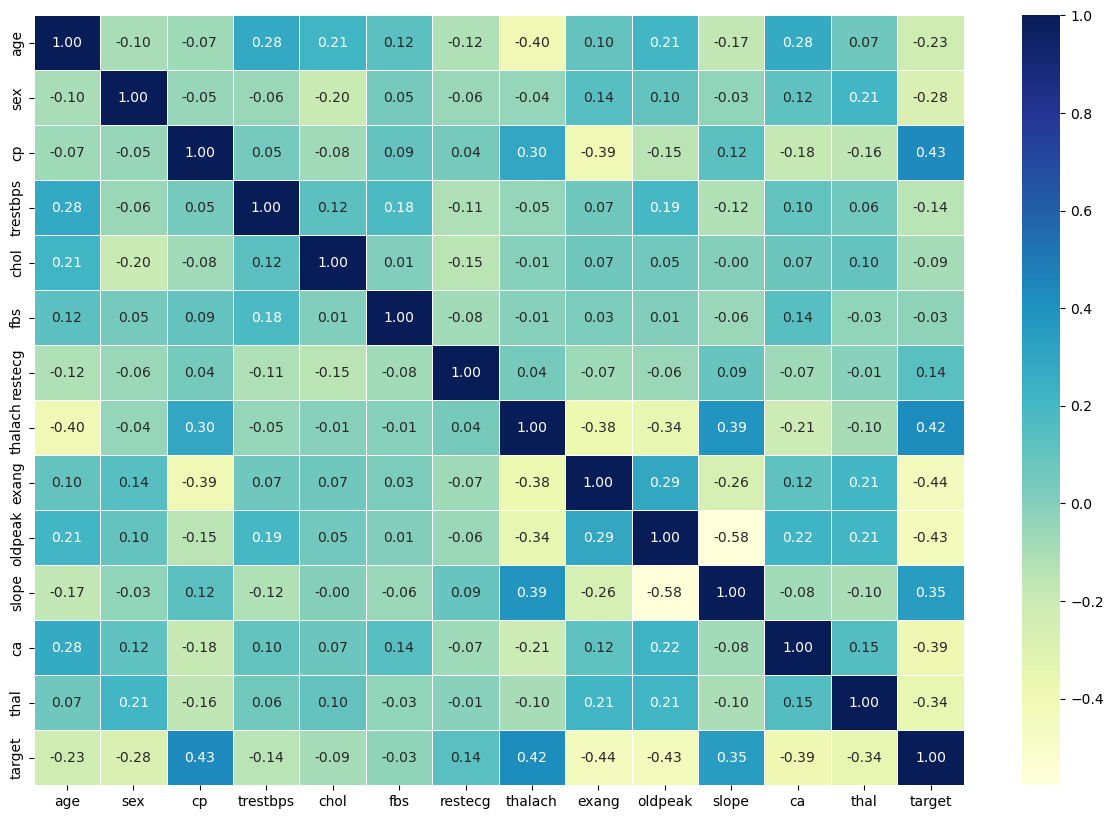

In [22]:
#let us make our correlation matrix a bit prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt='.2f',
               cmap='YlGnBu')
plt.show()

### 5.0 Modelling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
#split data into x and y
x=df.drop('target',axis=1)
y=df['target']


In [25]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
#split data into train & test sets
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into train and test, it is time to create our ML model

we will train it(find the pattern) on training set

Then find the test it(use the pattern) on the test set

we are going to try 3 Ml models:
1. LogisticRegression
2. K-Nearest Neighbours
3.  RandomForestClassifier

Note; it is a model for classification and not regression.

In [30]:
# put models in a dictionary
models= { 'Logistic Regression': LogisticRegression(),
         'KNN':KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier()}
# create a function to fit and score models
def fit_and_score (models,x_train,x_test,y_train,y_test):
    '''
    fits and evaluate different ML models.
    models: a dict of different ml models.
    '''
    # set random seed
    np.random.seed(42)

    # make a dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(x_train,y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name]= model.score(x_test,y_test)

    return model_scores


In [31]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\hp\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### model comparison

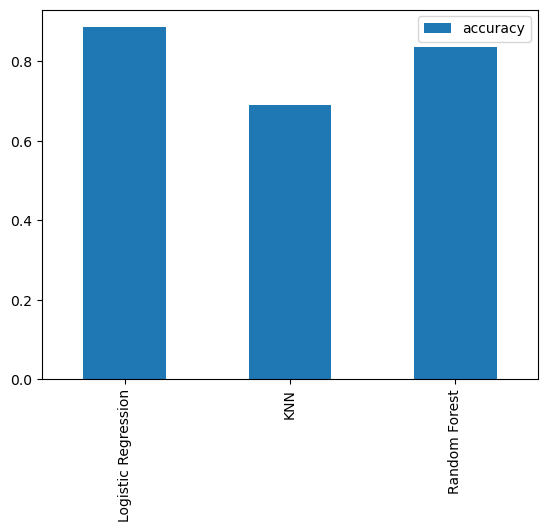

In [32]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar()
plt.show()

Now we have got a baseline , and we know a model's first prediction aren't what we should base our next step on.What should we do?

Let's look at the following:
* Hyperparameters tuning
* Feature importance
* confusion matrix
* Cross_validation
* Precision
* Recall
* f1 score
* classification report
* ROC curve
* Area under the curve

Hyperparameter tuning(By hand)

In [33]:
# let us tune KNN
train_scores = []
test_scores = []
# create a list of different values for n-neighbours
neighbors = range(1,21)
#set up knn instance
knn= KNeighborsClassifier()
# loop through differet n-neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #fit the training set
    knn.fit(x_train,y_train)

    # update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    # update the testing scores list
    test_scores.append(knn.score(x_test,y_test))

In [34]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [35]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum KNN score on the test data: 75.41%


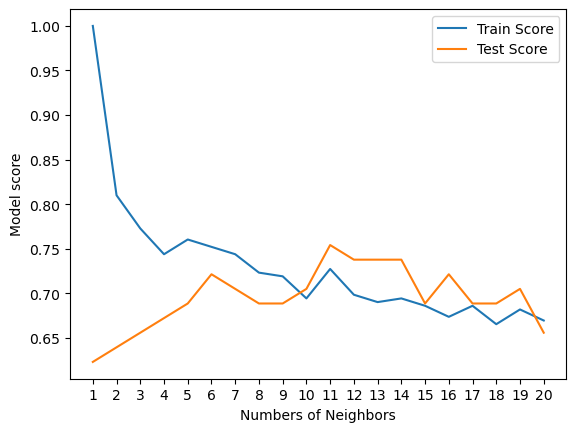

In [36]:
plt.plot(neighbors,train_scores,label='Train Score')
plt.plot(neighbors,test_scores,label='Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Numbers of Neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'maximum KNN score on the test data: {max(test_scores)*100:.2f}%')
plt.show()

### Hyperparameters tuning with RandomizedSearchCV
we are going to tune logisticRegression() model and RandomForestClassifier() ...using RandomizedSearchCV

In [37]:
## create hyperparrameter grid for LogisticRegression()
log_reg_grid = {'C':np.logspace(-4,4,20),
               'solver':['liblinear']}
## create hyperparameter for RandomforestClassifier()
rf_grid = {'n_estimators':np.arange(10,1000,50),
           'max_depth':[None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)}

Now we have got hyperparameters grids setup for each of our models,
Let's tune them using RandomizedSearchCV

In [38]:
# tune logisticregression
np.random.seed(42)
#set up random hyperparameters search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# fit random hyperparameter hyperparameter Search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [40]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we have tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [41]:
# set up random seed
np.random.seed(42)
# set up Random Hyperparameters search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
#find the best hyperparamaters
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [43]:
# Evaluate our randomized search RandomForestClassifier()
rs_rf.score(x_test,y_test)

0.8688524590163934

In [44]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Hyperparameters tuning using GridSearchCV
since our LogisticRegression() provides the best score so far, we will try and improve them again usin GridSearchCV..

In [45]:
# Different Hyperparameter for Our LogisticRegression()
log_reg_grid = {'C':np.logspace(-4,4,30),
                'solver':['liblinear']}
# set up grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
# Fit our Grid hyperparameter Search model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [46]:
#Check the best params
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [47]:
#Evaluate the GridSearchCv Logisticregression Model
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [48]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our tuned  Ml model beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

...and it would be great if cross-val is used where possible

In [49]:
#Make predictions with tuned model 
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [50]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

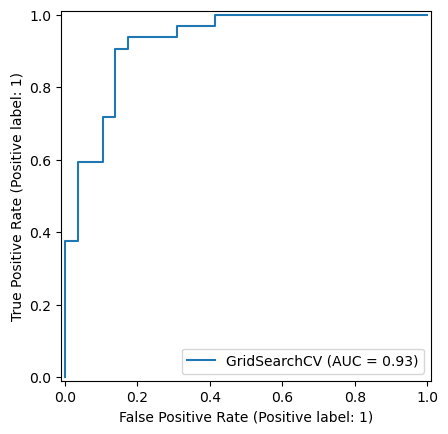

In [51]:
#Import ROC curve function from sklearn.metrics module- imported above there RocCurveDisplay
# Plot ROC curve and caclulte AUC metrics
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test)
plt.show()

In [52]:
# confusion matrix
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]])

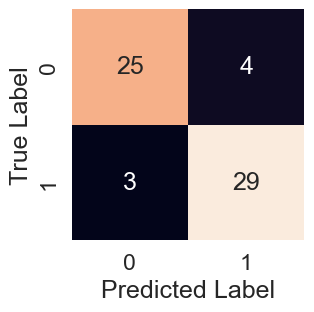

In [53]:
# Import seaborn(Done)
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    '''
    plots a nice looking confusion matrix using Seaborn's Heatmap()
    '''
    fig,ax= plt.subplots(figsize=(3,3))
    ax= sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
plot_conf_mat(y_test,y_preds)

Now let us get,calssification report, as well as cross-val precision,recall and f1-score

In [54]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



calculate evaluation matrix using cross-val; precision,recall and f1-score using `cross_val_score`

In [55]:
# check our best parameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [56]:
# create a new classifier with best parameters
clf= LogisticRegression(C=0.20433597178569418,
                        solver= 'liblinear')

In [57]:
# cross validated accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [58]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [59]:
#cross validated precision
cv_precision = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring='precision')
cv_precision= np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [60]:
#cross validated recall
cv_recall = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [61]:
# cross validated f1 score
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

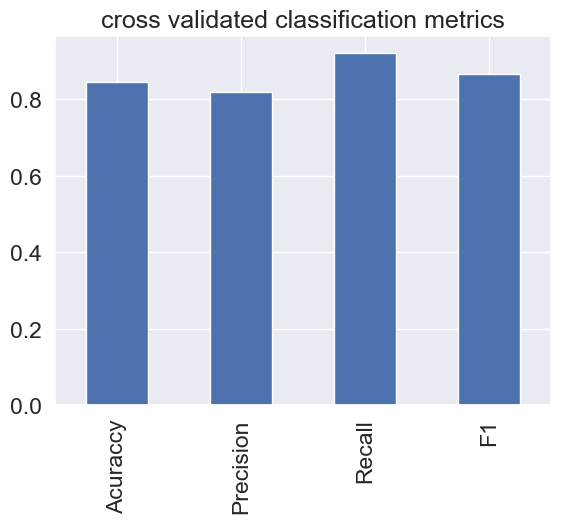

In [62]:
# visualize out cross validated metrics
cv_metrics = pd.DataFrame({'Acuraccy': cv_acc,
                           'Precision':cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title='cross validated classification metrics',
                     legend=False)
plt.show()

### Feature importance 
which features contributed most to the outcome of the model and how did it contribute?

Finding feature importance is different for each ML model. One way is search for '(MODEL NAME) feature importance'

Let us find feature importance for our LogisticRegression..

In [63]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
# Fit an instance for our LogisticRegression
clf= LogisticRegression(C=0.20433597178569418,
                        solver= 'liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [65]:
#check for coefficient()- coef_
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [66]:
# match coef's of features to columns
feature_dict= dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672721856887734),
 'sex': np.float64(-0.860445816920919),
 'cp': np.float64(0.6606707303492849),
 'trestbps': np.float64(-0.011569930902919925),
 'chol': np.float64(-0.001663741604035976),
 'fbs': np.float64(0.04386130751482091),
 'restecg': np.float64(0.3127578715206996),
 'thalach': np.float64(0.02459360818122666),
 'exang': np.float64(-0.6041303799858143),
 'oldpeak': np.float64(-0.5686285194546157),
 'slope': np.float64(0.4505161679452401),
 'ca': np.float64(-0.6360986316921434),
 'thal': np.float64(-0.6766337521354281)}

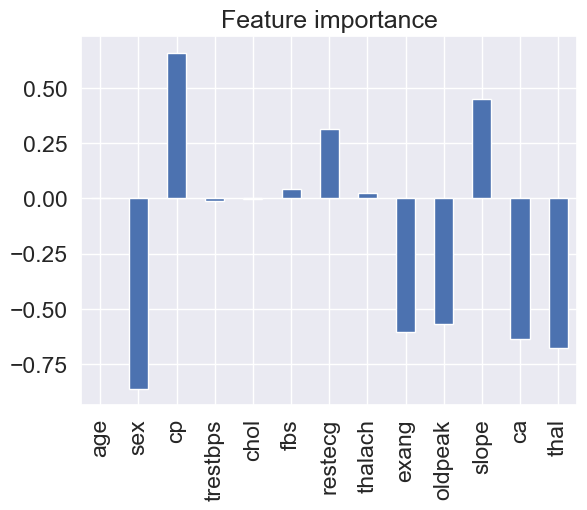

In [68]:
# visualize feature importance. and their contribution
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False)
plt.show()

In [69]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [70]:
##check of on coefficient(positive and negative)

In [71]:
pd.crosstab(df.slope,df.target)# positive coeff

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### Experimentation
We have been experimenting all along, esp from modelling.

If you haven't hit your evaluation metric yet,,,ask for:

* collect more data
* could you try a better model-- catboost or XGBoost?
* Could we improve our current model( beyond what we have done so far)
* If your model is good enough ( you have hit your evaluation metrics) how do you export it and share it?